# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi ogólne:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> ` # YOUR CODE HERE`<br/> ` raise NotImplementedError()`<br/> Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z funkcji przygotowanych w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce.
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, mieć nadane tytuły, opisane osie oraz odpowiednio dobrany rozmiar, wielkość punktów i grubość linii. Proporcje osi wykresów przedstawiających rozkłady punktów powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa grupy, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków grupy) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$. 

In [1]:
NAME = ""
COLLABORATORS = ""

---

## Zestaw zadań 5: Badanie relacji między punktami (część 2)

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
sns.set() 
sns.set_theme(style="whitegrid")

In [32]:
# Miejsce do wklejenie funkcji ze wcześniejszych zestawów zadań
# YOUR CODE HERE
def homogeneous_poisson_on_rectangle(intensity, x_lim, y_lim):
    """
    Parameters
    -------
    intensity: float
        Liczba dodatnia określająca intensywność procesu punktowego.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    pole = (x_lim[1] - x_lim[0]) * (y_lim[1] - y_lim[0])
    lambada = intensity * pole
    n = np.random.poisson(lambada, 1)
    probkix = np.random.uniform(x_lim[0], x_lim[1], n)
    probkiy = np.random.uniform(y_lim[0], y_lim[1], n)
    return pd.DataFrame({'X': probkix, 'Y': probkiy})
#raise NotImplementedError()

### Przygotowanie danych

Korzystając z funkcji przygotowanych w ramach pierwszego zestawu zadań wygeneruj rozkłady punktowe o podanych paramatrach.

Jednorodny rozkład Poissona:
 - intensywność procesu: 2.5

Rozkład regularny z komponentem losowym:
- liczba punktów w poziomie i w pionie: 15x15
- komponent losowy: 0.75

Rozkład Materna:
 - intensywność procesu macierzystego: 0.3
 - intensywność procesu potomnego: 5
 - promień klastra: 0.75
 
Parametry identyczne dla wszystkich rozkładów:
 - zakres wartości współrzędnej x: [0, 10]
 - zakres wartości współrzędnej y: [0, 10]
 
UWAGA! Dane do wygenerowania są identyczne jak w poprzednim zestawie zadań.

In [5]:
# YOUR CODE HERE
HP = pd.read_csv('dane_tymczasowe_HP5.csv')
R = pd.read_csv('dane_tymczasowe_R5.csv')
M = pd.read_csv('dane_tymczasowe_M5.csv')
#raise NotImplementedError()

### Zadanie 1: Funkcja G (25 pkt)

Przygotuj funkcję `g_function()`, która będzie generować dane niezbędne do wykonania wykresu funkcji G analizowanego rozkładu punktów oraz funkcję `g_function_poisson()`, która będzie generować dane niezbędne do wykonania wykresu teoretycznej funkcji G jednorodnego rozkładu Poissona danej wzorem: <br/>
$G(d) = 1 - exp(-\lambda \pi d^2)$ <br/>
gdzie: $\lambda$ - intensywność procesu, $d$ - odległość.

Następnie wykorzystaj przygotowane funkcje do wygnenerowania danych dla wszystkich przygotowanych rozkładów punktów. 

Przedstaw wyniki analizy graficznie w postaci wykresów liniowych funkcji G przygotowanych rozkładów punktów zestawionych z teoretyczną funkcją G jednorodnego rozkładu Poissona o intensywności $2.5$. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x3). Umieść analizowane rozkłady punktów w górnym wierszu, a wykresy funkcji G w dolnym wierszu figury. <br/>
Uwaga! Porównywane wykresy funkcji G powinny zaczynać się od $d=0$ (co może wymagać uzupełnienia danych o 0 w obrębie funkcji `g_function()`) i kończyć na wartości $d$, dla której funkcja G analizowanego rozkładu punktów osiąga wartość 1.

Algorytm postępowania:
1) Dla każdego z punktów analizowanego rozkładu wyliczamy dystans do jego najbliższego sąsiada $d_{min}$.
2) Konstruujemy funkcję G jako dystrybuantę rozkładu odległości: <br/>
    $G(d) = \frac{n_{d_{min} \le d}}{n}$  <br/>
    gdzie: $n_{d_{min} \le d}$ - liczba punktów, dla których odległość do najbliższego sąsiada $d_{min}$ jest mniejsza lub równa $d$, $n$ - liczba punktów.

#### a) Przygotowanie funkcji

In [24]:
def g_function(points):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    
    Returns
    -------
    g: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji G,
        - "G" - zawierającą wyliczone wartości funkcji G.
    """   
    # YOUR CODE HERE
    list1 = []
    list2 = []
    zakres = len(points)
    for i in range(zakres):
        nx = points['X'][i] - points['X'].drop(i)
        ny = points['Y'][i] - points['Y'].drop(i)
        pie = np.sqrt(nx**2 + ny**2)
        list1.append(pie.min())
    list1 = np.sort(list1)
    list1u = np.unique(list1)
    zakresl1 = len(list1)
    for i in list1u:
        suma = np.sum(list1 <= i)
        list2.append(suma/zakresl1)
    list1u = np.insert(list1u, 0, 0.0)
    list2.insert(0,0)
    return pd.DataFrame({"D": list1u, "G": list2})
    #raise NotImplementedError()
    
def g_function_poisson(d, intensity):
    """
    Parameters
    -------
    d: array
        Macierz zawierająca odległości, dla których ma zostać wyznaczona wartość funkcji G.
    intensity: float
        Liczba dodatnia określająca intensywność jednorodnego procesu Poissona.
    
    Returns
    -------
    g: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji G,
        - "G" - zawierającą wyliczone wartości funkcji G.
    """  
    # YOUR CODE HERE
    zakres = len(d)
    tab = np.array([])
    for i in range(zakres):
        gd = 1 - np.exp(-intensity*np.pi*(d[i]**2))
        tab = np.append(tab, gd)
    return pd.DataFrame({"D": d, "G": tab})            
    #raise NotImplementedError()

#### b) Wygenerowanie danych

In [25]:
# YOUR CODE HERE
gHP = g_function(HP)
gR = g_function(R)
gM = g_function(M)
gpHP = g_function_poisson(gHP["D"], 2.5)
gpR = g_function_poisson(gR["D"], 2.5)
gpM = g_function_poisson(gM["D"], 2.5)
#raise NotImplementedError()

#### c) Wizualizacja

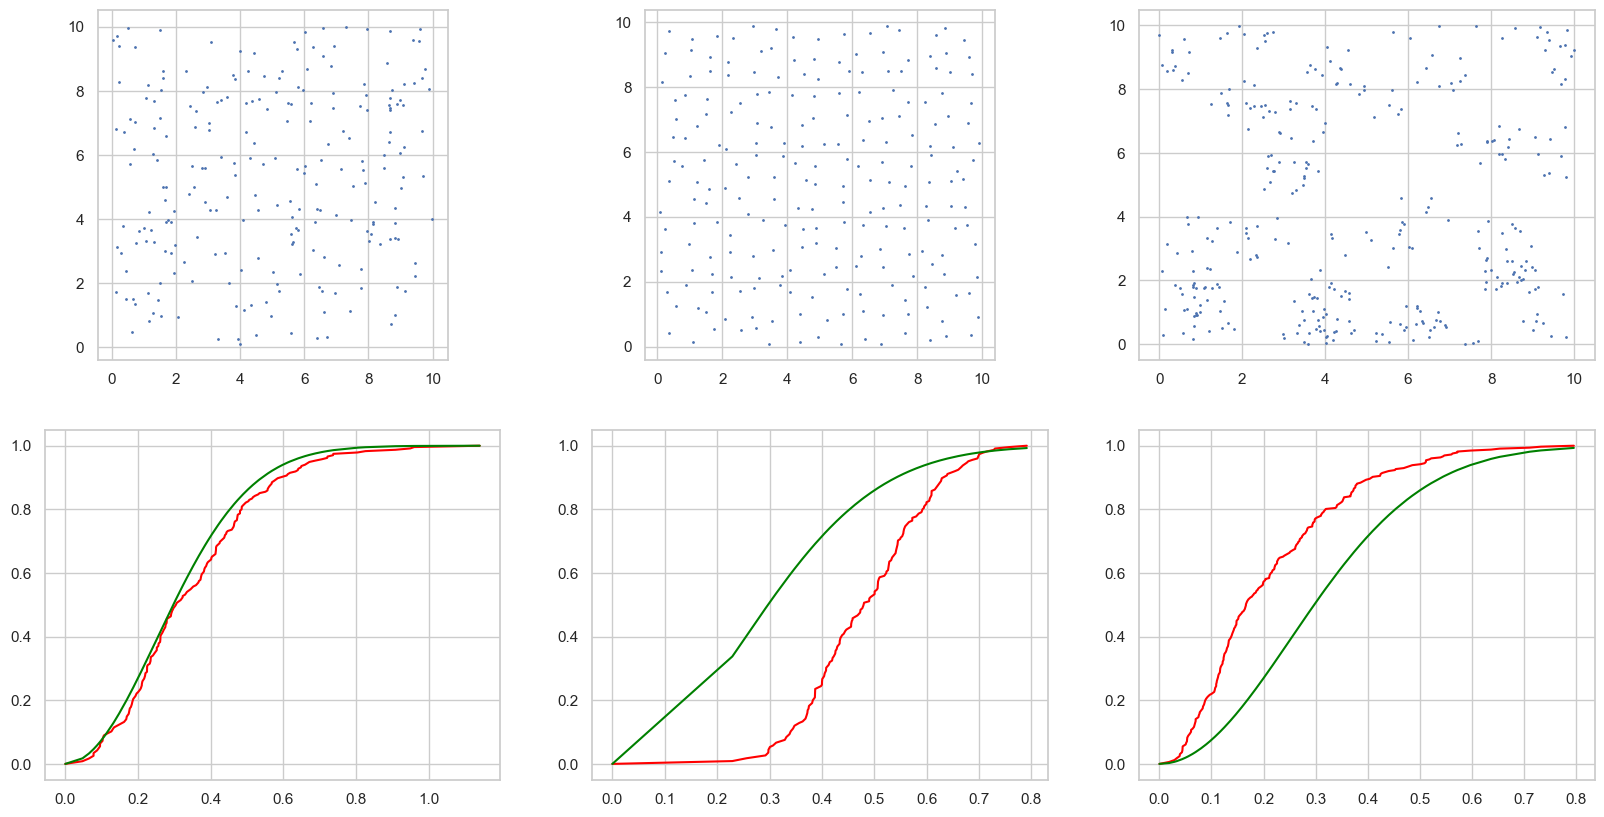

In [29]:
# YOUR CODE HERE
fig, axs = plt.subplots(2,3, figsize=(20,10))
axs[0,0].scatter(HP['X'], HP['Y'], s = 1)
axs[0,0].axis('square')

axs[0,1].scatter(R['X'], R['Y'], s = 1)
axs[0,1].axis('square')

axs[0,2].scatter(M['X'], M['Y'], s = 1)

axs[1,0].plot(gHP['D'], gHP['G'], c = 'red')
axs[1,0].plot(gpHP['D'], gpHP['G'], c = 'green')


axs[1,1].plot(gR['D'], gR['G'],c = 'red')
axs[1,1].plot(gpR['D'], gpR['G'], c = 'green')


axs[1,2].plot(gM['D'], gM['G'],c = 'red')
axs[1,2].plot(gpM['D'], gpM['G'], c = 'green')

#raise NotImplementedError()

### Zadanie 2: Funkcja F (25 pkt)

Przygotuj funkcję `f_function()`, która będzie generować dane niezbędne do wykonania wykresu funkcji F analizowanego rozkładu punktów oraz funkcję `f_function_poisson()`, która będzie generować  dane niezbędne do wykonania wykresu teoretycznej funkcji F jednorodnego rozkładu Poissona danej wzorem: <br/>
$F(d) = 1 - exp(-\lambda \pi d^2)$ <br/>
gdzie: $\lambda$ - intensywność procesu, $d$ - odległość.

Następnie wykorzystaj przygotowane funkcje do wygnenerowania danych dla wszystkich przygotowanych rozkładów punktów. 

Przedstaw wyniki analizy graficznie w postaci wykresów liniowych funkcji F przygotowanych rozkładów punktów zestawionych z teoretyczną funkcją F jednorodnego rozkładu Poissona o intensywności $2.5$. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x3). Umieść analizowane rozkłady punktów w górnym wierszu, a wykresy funkcji F w dolnym wierszu figury. <br/>
Uwaga! Porównywane wykresy funkcji F powinny zaczynać się od $d=0$ (co może wymagać uzupełnienia danych o 0 w obrębie funkcji `f_function()`) i kończyć na wartości $d$, dla której funkcja F analizowanego rozkładu punktów osiąga wartość 1.

Algorytm postępowania:
1) Z wykorzystaniem procesu regularnego lub jednorodnego procesu Poissona generujemy w obrębie analizowanego rozkładu zestaw punktów pomiarowych.
2) Dla każdego z punktów rozkładu pomiarowego wyliczamy dystans do jego najbliższego sąsiada z analizowanego rozkładu $d_{min}$.
3) Konstruujemy funkcję F jako dystrybuantę rozkładu odległości: <br/>
    $F(d) = \frac{n_{d_{min} \le d}}{n}$  <br/>
    gdzie: $n_{d_{min} \le d}$ - liczba punktów rozkładu pomiarowego, dla których odległość do najbliższego sąsiada z analizowanego rozkładu $d_{min}$ jest mniejsza lub równa $d$, $n$ - liczba punktów rozkładu pomiarowego.
    
Uwaga! Liczba punktów rozkładu pomiarowego jest istotna i wpływa na dokładność rozwiązania.

#### a) Przygotowanie funkcji

In [36]:
def f_function(points, test_points):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów analizowanego rozkłądu opisane jako "X" i "Y".
    test_points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów pomiarowych, dla których mają zostać wyznaczone odległości
        do najbliższego sąsiada z analizowanego rozkładu opisane jako "X" i "Y".
    
    Returns
    -------
    f: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji F,
        - "F" - zawierającą wyliczone wartości funkcji F.
    """   
    # YOUR CODE HERE
    list1 = []
    list2 = []
    zakres = len(test_points)
    for i in range(zakres):
        nx = test_points['X'][i] - points['X']
        ny = test_points['Y'][i] - points['Y']
        pie = np.sqrt(nx**2 + ny**2)
        list1.append(pie.min())
    list1 = np.sort(list1)
    list1u = np.unique(list1)
    zakresl1 = len(list1)
    for i in list1u:
        suma = np.sum(list1 <= i)
        list2.append(suma/zakresl1)
    list1u = np.insert(list1u, 0, 0.0)
    list2.insert(0,0)
    return pd.DataFrame({"D": list1u, "F": list2})
    #raise NotImplementedError()
    
def f_function_poisson(d, intensity):
    """
    Parameters
    -------
    d: array
        Macierz zawierająca odległości, dla których ma zostać wyznaczona wartość funkcji F.
    intensity: float
        Liczba dodatnia określająca intensywność jednorodnego procesu Poissona.

    Returns
    -------
    f: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji F,
        - "F" - zawierającą wyliczone wartości funkcji F.
    """  
    # YOUR CODE HERE
    zakres = len(d)
    tab = np.array([])
    for i in range(zakres):
        fd = 1 - np.exp(-intensity*np.pi*(d[i]**2))
        tab = np.append(tab, fd)
    return pd.DataFrame({"D": d, "F": tab}) 
    #raise NotImplementedError()

#### b) Wygenerowanie danych

In [37]:
# YOUR CODE HERE
test_points=homogeneous_poisson_on_rectangle(2.5, [0, 10], [0, 10])
fHP = f_function(HP, test_points)
fR = f_function(R, test_points)
fM = f_function(M, test_points)
fpHP = f_function_poisson(fHP["D"], 2.5)
fpR = f_function_poisson(fR["D"], 2.5)
fpM = f_function_poisson(fM["D"], 2.5)
#raise NotImplementedError()

#### c) Wizualizacja

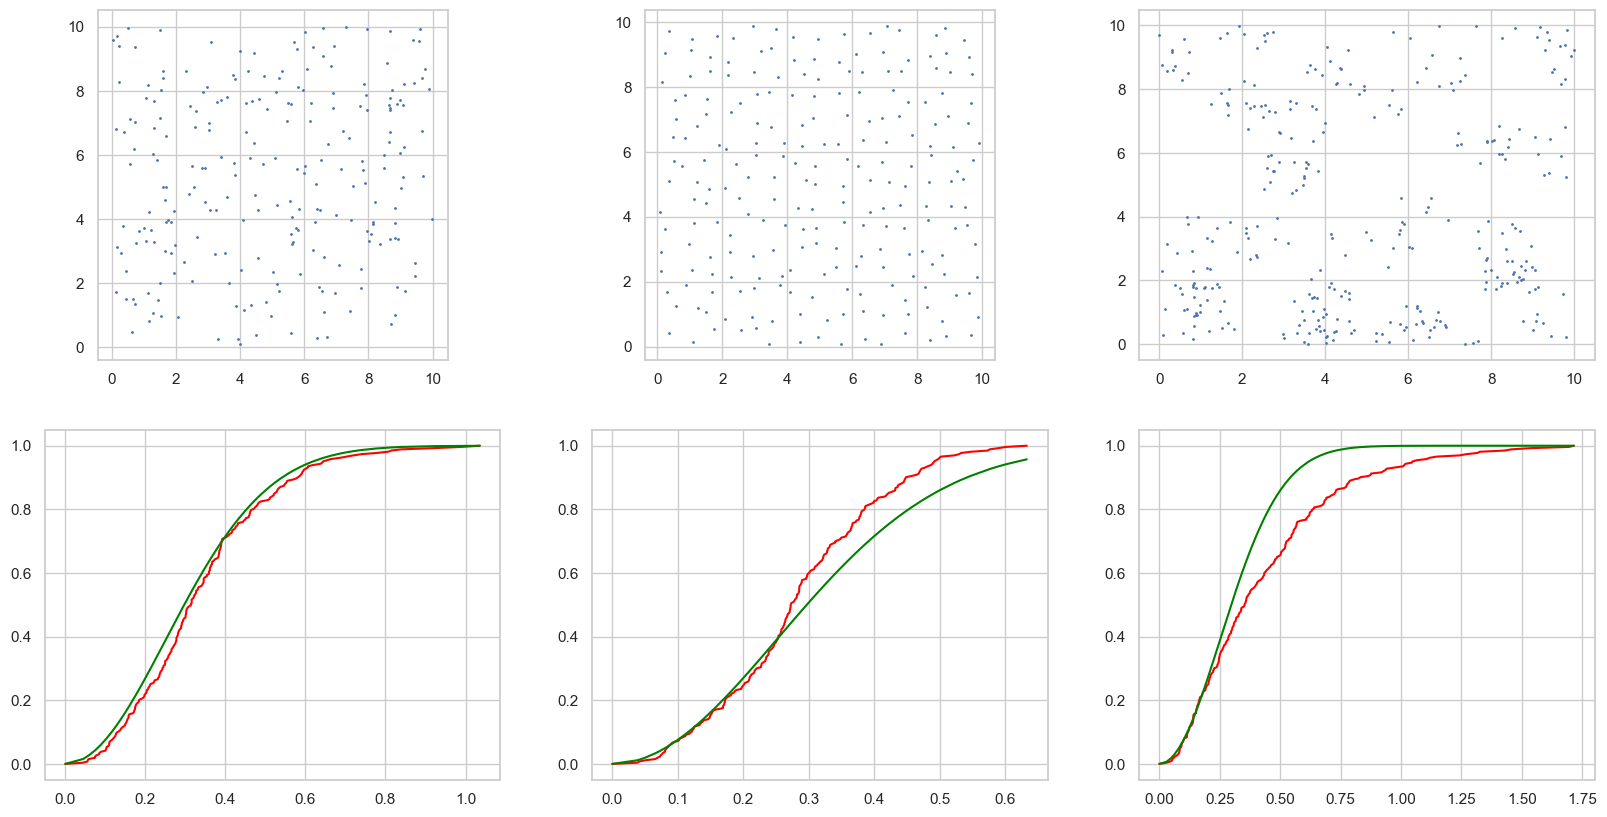

In [38]:
# YOUR CODE HERE
fig, axs = plt.subplots(2,3, figsize=(20,10))
axs[0,0].scatter(HP['X'], HP['Y'], s = 1)
axs[0,0].axis('square')

axs[0,1].scatter(R['X'], R['Y'], s = 1)
axs[0,1].axis('square')

axs[0,2].scatter(M['X'], M['Y'], s = 1)

axs[1,0].plot(fHP['D'], fHP['F'], c = 'red')
axs[1,0].plot(fpHP['D'], fpHP['F'], c = 'green')


axs[1,1].plot(fR['D'], fR['F'],c = 'red')
axs[1,1].plot(fpR['D'], fpR['F'], c = 'green')


axs[1,2].plot(fM['D'], fM['F'],c = 'red')
axs[1,2].plot(fpM['D'], fpM['F'], c = 'green')
#raise NotImplementedError()